In [4]:
import pandas as pd
import numpy as np

# Summarizing, Aggregating & Grouping
Knowing how to use pandas aggregation & grouping functions lets us reduce the dimensionality of our data and visualize it in different ways (most often over the rows - aka `axis=0`).  

For completeness, `axis=1` refers to the columns.

In [5]:
wine = pd.read_csv('data/wine_reviews/winemag-data_first150k.csv', index_col=0)

## Initial quick analysis using pandas
Pandas has multiple built-in functions that make it easy to quickly see what's in your dataframe. 
You can build them with the selecting tools you used before.

Here, we will select a column, and then see how pandas lets us quickly analyse it.

To quickly see which columns our wine dataset has, we can use the .columns attribute.

In [3]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Let's select price.

In [4]:
price = wine.loc[:, 'price']

We can quickly see some metrics of the price, using some built-in aggregating functions in pandas.

In [6]:
print("average wine price:", price.mean())
print("minimum price", price.min())
print("Max price", price.max())
print("media price", price.median())

average wine price: 33.13148249353299
minimum price 4.0
Max price 2300.0
media price 24.0


And some more advanced metrics...

We can see how many times each country appears in the datast (called a value count)

In [8]:
wine.loc[:, "country"].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

What if we want to see this list in the opposite order?

In [9]:
wine.loc[:, "country"].value_counts().sort_index()

Albania                       2
Argentina                  5631
Australia                  4957
Austria                    3057
Bosnia and Herzegovina        4
Brazil                       25
Bulgaria                     77
Canada                      196
Chile                      5816
China                         3
Croatia                      89
Cyprus                       31
Czech Republic                6
Egypt                         3
England                       9
France                    21098
Georgia                      43
Germany                    2452
Greece                      884
Hungary                     231
India                         8
Israel                      630
Italy                     23478
Japan                         2
Lebanon                      37
Lithuania                     8
Luxembourg                    9
Macedonia                    16
Mexico                       63
Moldova                      71
Montenegro                    2
Morocco 

This list is too long. What if we only want to see the top 10 countries?
We can string together the other selectors we learned before!

Can you think of another way to get the top 10 rows?

In [10]:
wine.loc[:, "country"].value_counts().sort_index().head(10)

Albania                      2
Argentina                 5631
Australia                 4957
Austria                   3057
Bosnia and Herzegovina       4
Brazil                      25
Bulgaria                    77
Canada                     196
Chile                     5816
China                        3
Name: country, dtype: int64

In [15]:
wine.loc[:, "province"].value_counts().head(10)
# wine.province.value_counts().head() NOTE this is discouraged!

California        44508
Washington         9750
Tuscany            7281
Bordeaux           6111
Northern Spain     4892
Name: province, dtype: int64

What's the difference between `.value_counts()` and `.count()`?

In [16]:
wine.loc[:, "country"].value_counts().head()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

In [18]:
wine.loc[:, "country"].count() # number of non-null vals

150925

What if we just want to know how many countries are on the list?

In [21]:
# Number of non-null unique values
wine.loc[:, "country"].nunique()

48

And if we want a list of them? 
(This isn't a pandas thing, but is still super useful:)

In [23]:
# Gives all unique values as a LIST
wine.loc[:, "country"].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [24]:
set(wine.loc[:, "country"]) # as a SET

{'Albania',
 'Argentina',
 'Australia',
 'Austria',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Egypt',
 'England',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Mexico',
 'Moldova',
 'Montenegro',
 'Morocco',
 'New Zealand',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Switzerland',
 'Tunisia',
 'Turkey',
 'US',
 'US-France',
 'Ukraine',
 'Uruguay',
 nan}

You can look [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) for a list of all the built-in pandas stats.

Remember, for quick calculation of summary statistics we can use `df.describe()`. This quickly calculates some of these stats for the numeric columns in the df.

**Question**: Why are only 2 of the columns included?

### Conditional Selections 
We can use conditional selections to narrow our analysis even further.

DON'T FORGET - to make things easier, we can save selections we plan to use often as their own variables.

In [27]:
us = wine.loc[wine.loc[:, "country"]=="US"]
france = wine.loc[wine.loc[:, "country"]=="France"]

In [25]:
wine.loc[:, "country"]=="US" # mask of true's and false's

0          True
1         False
2          True
3          True
4         False
          ...  
150925    False
150926    False
150927    False
150928    False
150929    False
Name: country, Length: 150930, dtype: bool

Let's compare the difference in average price between US wines, French wines, and all the wines in our complete dataset.

In [28]:
# calculating average wine prices 
avg_us = round(us.loc[:, "price"].mean(), 2)
avg_french_prices = round(france.loc[:, "price"].mean(), 2)
avg_ovearll_price = round(wine.loc[:, "price"].mean(), 2)

# printing prices
print("Avg. is {} more blablabla").format(round(avg_fr - avg_french_price), 2)

We can then use these to calculate more targeted metrics.

#### More advanced conditionals: Using masks
What if we want to filter on more than one criteria? 

When you want to filter on >1 criteria, it can be easier to use a mask.

How many wines from North America do we have on our list?

In [6]:
na_mask = (wine.loc[:, "country"]=="US") | (wine.loc[:, "country"]=="Mexico") | (wine.loc[:, "country"]=="Canada")
na_indexes = wine.index[na_mask]
na = wine.loc[na_indexes]
# or
na_1 = wine.loc[na_mask]


In [7]:
na.head(5)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


How many wines do we have total in the in North America?

In [10]:
# taking one of the columns that had no null values to get "real" count
na.shape[0]

62656

**Question**: How many of the wines belong to each country?



In [16]:
na.loc[:, "country"].value_counts()


US        62397
Canada      196
Mexico       63
Name: country, dtype: int64

In [17]:
for i in na.loc[:, "country"].unique():
    total = wine.loc[wine.loc[:, "country"]==i].shape[0]
    print(f"{i} has a total of {total} wines")

US has a total of 62397 wines
Canada has a total of 196 wines
Mexico has a total of 63 wines


**Question**: From which US state do most of our wines come?

In [26]:
# CHECK!!!!!!!!!
# na.loc[na.loc[:, "country"] == "US"].province.value_counts().head(1).values[0]

44508

## Groupby
One of the most flexible ways to aggregate in pandas is with .groupby() .
We will look at how this works for categorical datasets like this one, and also for datetime datasets, as dealing with datetimes in pandas can be tricky.

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

### How Groupby Works:
You can group your data in many different ways, and also aggregate it by any of the aggregators we saw before: like mean, mode, sum, etc.

**The column that you put in the parentheses of the groupby function call will become your new index in the dataframe that is returned by groupby!!**

For example, in `wine.groupby('country')`, `country` will bee the new index. Let's see how this looks in practice:

In [29]:
wine.groupby('country').mean().head(5)

,points,price
country,,
Albania,88.000000,20.000000
Argentina,85.996093,20.794881
Australia,87.892475,31.258480
Austria,89.276742,31.192106
Bosnia and Herzegovina,84.750000,12.750000


In [32]:
# sort by desc price
wine.groupby('country').mean().sort_values(by=["price"], ascending=False).head(5)

,points,price
country,,
US-France,88.000000,50.000000
England,92.888889,47.500000
France,88.925870,45.619885
Hungary,87.329004,44.204348
Luxembourg,87.000000,40.666667


In [34]:
wine.groupby("country").mean().sort_values(by="points", ascending=False).head(5)

,points,price
country,,
England,92.888889,47.500000
Austria,89.276742,31.192106
France,88.925870,45.619885
Germany,88.626427,39.011078
Italy,88.413664,37.547913


So, British wine is the highest average ranked?? This is surprising. Maybe we need to look at our data in a different way.

In [35]:
wine.groupby("country").agg({"points": "max", "price": "mean"})\
    .sort_values(by="points", ascending=False).head()


,points,price
country,,
Italy,100,37.547913
Australia,100,31.258480
US,100,33.653808
France,100,45.619885
Portugal,99,26.332615


The beauty of `df.groupby()` is that it lets you aggregate different columns in different ways.

Say we want to know the average price of wine in each country, but the _highest_ score:

In [ ]:
wine.groupby("country").agg({"points": "mean", "price": "mean"})\
    .sort_values(by=["points", "price"], ascending=[False, True]).head()


**Tip:** Sometimes, fo make your code cleaner it's best to move the aggregations out and store them in their own variable that you can update saparately.

In [40]:
aggs = {
    "price": "mean",
    "points": "mean"
}
wine.groupby("country").agg(aggs).sort_values(by=["points", "price"], ascending=[False, True]).head()

,price,points
country,,
England,47.500000,92.888889
Austria,31.192106,89.276742
France,45.619885,88.925870
Germany,39.011078,88.626427
Italy,37.547913,88.413664


You can also use a list in your aggs to aggergate one column in different ways.

This will give a **multi-index**. Multi-indexes can be difficult to sort on. But, there are a few different ways we can deal with this.

In [84]:
aggs = {
    "price": ["min", "mean", "max", "std"]
}
price_table = wine.groupby("country").agg(aggs)
price_table.head()

price                              
                         min       mean     max        std
country                                                   
Albania                 20.0  20.000000    20.0   0.000000
Argentina                4.0  20.794881   250.0  20.186540
Australia                5.0  31.258480   850.0  39.008512
Austria                  8.0  31.192106  1100.0  28.540861
Bosnia and Herzegovina  12.0  12.750000    13.0   0.500000

In [43]:
price_table.columns

MultiIndex([('price',  'min'),
            ('price', 'mean'),
            ('price',  'max'),
            ('price',  'std')],
           )

In [47]:
# you can use tuples to access
price_table.loc[:, ("price", "min")].head()

country
Albania                   20.0
Argentina                  4.0
Australia                  5.0
Austria                    8.0
Bosnia and Herzegovina    12.0
Name: (price, min), dtype: float64

One way is by dropping the top level ('price'):

In [58]:
# or you can drop the parent
price_table.columns = price_table.columns.droplevel(level=0)

# nowwe can sort by any of the cols directly
price_table.sort_values(by="mean", ascending=False).head()

,min,mean,max,std
country,,,,
US-France,50.0,50.000000,50.0,NaN
England,38.0,47.500000,75.0,11.964232
France,5.0,45.619885,2300.0,69.697060
Hungary,7.0,44.204348,764.0,66.264502
Luxembourg,36.0,40.666667,50.0,7.000000


Another way is by using `np.ravel()` . This preserves the "price" indicator somewhere in each of the column names.

In [82]:
# resetting the price table, so that it again has a multi-index
price_wine = wine.groupby("country").agg(aggs)


In [50]:
# seeing how the column names are multi-index
price_table.columns

Index(['min', 'mean', 'max', 'std'], dtype='object')

In [85]:
# Using ravel, and a string join, we can create better names for the columns:
price_table.columns = ["_".join(i) for i in price_table.columns.ravel()]
price_table.sort_values(by="price_mean", ascending=False).head()

,price_min,price_mean,price_max,price_std
country,,,,
US-France,50.0,50.000000,50.0,NaN
England,38.0,47.500000,75.0,11.964232
France,5.0,45.619885,2300.0,69.697060
Hungary,7.0,44.204348,764.0,66.264502
Luxembourg,36.0,40.666667,50.0,7.000000


**Question**: Create a quick plot of the number of wines made in each country, from highest to lowest.

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline


wines_per_country = wine.groupby("country").agg({"description": "count"}).sort_values(by="description", ascending=False)
wines_per_country.loc[:,["country", "description"]].plot.hist()


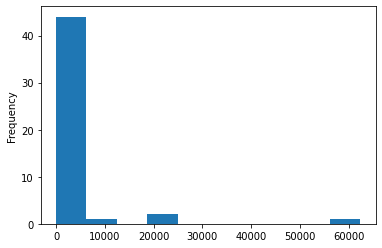

In [80]:
my_list = wine.loc[:, 'country'].value_counts()
my_list.plot.hist()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("# of wines per country")
ax.set_xlabel("# of wines")
wine.loc[:, "country"].value_counts().plot(axes=ax, kind="bar", )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

wine.country.value_counts() #series

plt.figure(figsize=(16,6))

plt.title("Number of wines made in each country, from high to low", fontsize=18)

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=wine.country.value_counts().index[:15], y=wine.country.value_counts().values[:15])

# Add label for vertical axis
plt.ylabel("Number of wines", fontsize=16)

plt.savefig("pandas_course.jpg")

## Selecting the max and min values with Index Max and Min
In addition to `.max()` and `.min()`, which returns the maximum or minimum values, we can use `.idxmax()` and `.idxmin()` to return the *index* pertaining to the maximum and minimum values. 

For example, let's use `.idxmax()` to find the country with the highest standard deviation in its prices.

In [86]:
price_table.loc[:, "price_std"].max()

69.6970600395194

In [87]:
price_table.loc[:, "price_std"].idxmax()

'France'

# Dealing with datetime in Pandas
Pandas built off the datetime package in Python to offer a datetime index, and plenty of ways to work with this.
However, it is still far from intuitive. 
That doesn't mean it's not useful, and for anyone doing a timeseries project, you'll need to deal with dates and times in pandas often.

Let's load a sample dataset of datetime energy data and get started!

In [88]:
energy = pd.read_csv('data/energy/PJM_Load_hourly.csv', parse_dates=True, index_col=0)

Note that this data has a DateTimeIndex. 
setting `parse_dates=True` when we read the CSV lets pandas infer this datetimeindex.

In [103]:
energy.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2001-01-01 15:00:00', '2001-01-01 16:00:00',
               '2001-01-01 17:00:00', '2001-01-01 18:00:00',
               '2001-01-01 19:00:00', '2001-01-01 20:00:00',
               '2001-01-01 21:00:00', '2001-01-01 22:00:00',
               '2001-01-01 23:00:00', '2001-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=32896, freq=None)

We can select data points within a specific time range, using the DateTimeIndex and .loc.
Here, we select the first one day of data.

In [91]:
energy.loc["1998-12-31 01:00:00":"1999-01-01 00:00:00"].head()

,PJM_Load_MW
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0


In [92]:
# One record for each hour of this day.
energy.loc["1998-12-31 01:00:00":"1999-01-01 00:00:00"].shape[0]

24

## Selecting with boolean indexing on pandas datetimeindex
We can use .dot notation with parts of the date to select on specific parts of the datetime, like days or months.

This is because pandas datetime indexes are datetime objects under the hood.

Let's look more closely at datetime objects in python.

Python datetime functionality example:

In [93]:
from datetime import datetime

We will start with a string of a date, and save this string in a variable called `s`.

In [95]:
s = "8 March, 2017"

Using a datetime function called `datetime.strptime()`, we can "extract" the date elements from this string.

We do this by giving formatting indicators as to where in the string the various datetime elements are located. The format indicator `%d` denotes an integer day, `%B` denotes a long-form month written in English, and `%Y` denotes a 4-digit year.

You can find more datetime format indicators in python [here](https://mkaz.blog/code/python-dates/) (under "Datetime Format Table").


Using the `.strptime()` function returns a **datetime object**, with the parts of the datetime contained in order from lowest time-granularity to highest (year --> seconds)

In [98]:
d = datetime.strptime(s, "%d %B, %Y")
d

datetime.datetime(2017, 3, 8, 0, 0)

As mentioned before, we can access particular parts of this datetime object using dot notation (as they are stored as attributes of the object)

In [99]:
d.month

3

We can then use a second function from datetime, called `strftime()`, to convert this datetime object back to a string. Here, we have to specify the new string format we would like the new date string to have.

In [100]:
new_s = d.strftime("%Y-%m-%d")
new_s

'2017-03-08'

Now that we know about the various parts of a datetime object, we can use them to filter conditionally on the datetime object.

In [101]:
# making a new DF that only includes the month of septmeber from each year.
septembers = energy.loc[energy.index.month==9]
septembers.head()

,PJM_Load_MW
Datetime,
1998-09-30 01:00:00,22127.0
1998-09-30 02:00:00,21028.0
1998-09-30 03:00:00,20339.0
1998-09-30 04:00:00,20295.0
1998-09-30 05:00:00,20548.0


We can also call just a date, and get all the hours/time periods in that day:

In [104]:
energy.loc["2000-01-03"]

,PJM_Load_MW
Datetime,
2000-01-03 01:00:00,21557.0
2000-01-03 02:00:00,20464.0
2000-01-03 03:00:00,20057.0
2000-01-03 04:00:00,19988.0
2000-01-03 05:00:00,20463.0
2000-01-03 06:00:00,22228.0
2000-01-03 07:00:00,25780.0
2000-01-03 08:00:00,28369.0
2000-01-03 09:00:00,29126.0


Same with for a year and month:

In [105]:
energy.loc["2000-01"]

,PJM_Load_MW
Datetime,
2000-01-01 00:00:00,27487.0
2000-01-31 01:00:00,28064.0
2000-01-31 02:00:00,27283.0
2000-01-31 03:00:00,27194.0
2000-01-31 04:00:00,27326.0
...,...
2000-01-01 20:00:00,29331.0
2000-01-01 21:00:00,28912.0
2000-01-01 22:00:00,28139.0


In [106]:
# We see that it includes one record for each our of each day of the month of January, which has 31 days
energy.loc["2000-01"].shape

(744, 1)

In [107]:
31 * 24

744

In [109]:
# or better, with an assert statement:
jan_2000 = energy.loc["2000-01"]

# assert passes silently, meaning it is True
assert jan_2000.shape[0] == 31 * 24

## Resampling
We can also combine the data in different ways, and over different time periods.
This means that just because our data is in hourly time periods, we dont have to keep it that way. 

In [110]:
# We can get the average load over a day:
daily_avg_energy = energy.resample("D").mean()
daily_avg_energy

,PJM_Load_MW
Datetime,
1998-04-01,27813.739130
1998-04-02,26605.791667
1998-04-03,25672.333333
1998-04-04,24487.083333
1998-04-05,23487.565217
...,...
2001-12-28,32489.875000
2001-12-29,30068.250000
2001-12-30,30958.833333


In [111]:
# We can also get the total MWh used in a day:
daily_energy = energy.resample("D").sum()
# have to change unit from MW to MWh since summing changes measure from power to energy 
# more info on that here: https://energyeducation.ca/encyclopedia/Energy_vs_power
daily_energy.columns = ["PJM_Load_Mwh"]
daily_energy.head()

,PJM_Load_Mwh
Datetime,
1998-04-01,639716.0
1998-04-02,638539.0
1998-04-03,616136.0
1998-04-04,587690.0
1998-04-05,540214.0


## Groupby with DateTimeIndex
Using groupby with a pandas DateTimeIndex can be extremely useful and powerful.
Let's look at how this can work.

In [112]:
indexes = [energy.index.year,
           energy.index.month,
           energy.index.week,
           energy.index.day]

aggregated = energy.groupby(indexes).sum()

In [113]:
aggregated.head()

PJM_Load_MW
Datetime Datetime Datetime Datetime             
1998     4        14       1            639716.0
                           2            638539.0
                           3            616136.0
                           4            587690.0
                           5            540214.0

The index level names are not particularly helpful here. We can change them.

In [114]:
# the long, ugly way
aggregated.index.set_names("year", level=0, inplace=True)
aggregated.index.set_names("month", level=0, inplace=True)
aggregated.index.set_names("week", level=0, inplace=True)
aggregated.index.set_names("day", level=0, inplace=True)

In [117]:
# the PRO way

# resetting the df to get multi-index again
aggregated = energy.groupby(indexes).sum()

# the short, clean way. Both do the same thing.
index_level_names = ["year", "month", "week", "day"]
for i, index_level in enumerate(index_level_names):
    aggregated.index.set_names(index_level, level=i, inplace=True)

In [118]:
aggregated

PJM_Load_MW
year month week day             
1998 4     14   1       639716.0
                2       638539.0
                3       616136.0
                4       587690.0
                5       540214.0
...                          ...
2001 12    52   27      794222.0
                28      779757.0
                29      721638.0
                30      743012.0
2002 1     1    1        31569.0

[1372 rows x 1 columns]

## Selecting on Multi-Index: Using reset_index()
Selecting via a multi-index is difficult. It is much easier to work with these as "normal" pandas DataFrame columns.

To transform multi-indexes in to columns, we use `reset_index()`. Reset index pushes anything in the index into columns, and makes a new index with is simply an ascending count, starting at 0. 

In [119]:
aggregated_new = aggregated.reset_index()
aggregated_new

,year,month,week,day,PJM_Load_MW
0,1998,4,14,1,639716.0
1,1998,4,14,2,638539.0
2,1998,4,14,3,616136.0
3,1998,4,14,4,587690.0
4,1998,4,14,5,540214.0
...,...,...,...,...,...
1367,2001,12,52,27,794222.0
1368,2001,12,52,28,779757.0
1369,2001,12,52,29,721638.0
1370,2001,12,52,30,743012.0


Here, we can select all rows that were in week 50 in any year.

In [123]:
week_50 = aggregated_new.loc[aggregated_new.loc[:, "week"]==50]
week_50.head()

,year,month,week,day,PJM_Load_MW
250,1998,12,50,7,648160.0
251,1998,12,50,8,665456.0
252,1998,12,50,9,682451.0
253,1998,12,50,10,714059.0
254,1998,12,50,11,696829.0


## Exercise:

- Find the day of the week that averages the highest consumption

- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?
    

- Is average consumption rising, falling, or staying the same over the years?
- What is the %age difference in consumption on average between April and June?

- Find the day of the week that averages the highest consumption

In [138]:
#energy_dt = datetime.strptime(energy, "%Y-%m-%d")
energy_hourly



,PJM_Load_MW
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0
...,...
2001-01-01 20:00:00,35209.0
2001-01-01 21:00:00,34791.0
2001-01-01 22:00:00,33669.0


- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?

In [139]:
time_of_day = energy.groupby(energy.index.hour).mean()
time_of_day.sort_values(by="PJM_Load_MW", ascending=True).index[0]

4

- Is average consumption rising, falling, or staying the same over the years?

<AxesSubplot:xlabel='Datetime'>

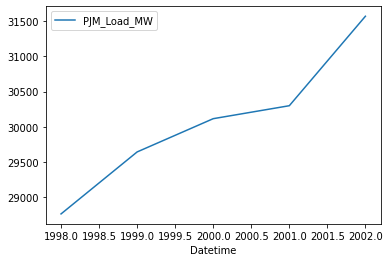

In [142]:
energy.groupby([energy.index.year]).mean().plot()


- What is the %age difference in consumption on average between April and June?

In [141]:
avg_monthly_consumption = energy.groupby(energy.index.month).mean()
april_consumo = avg_monthly_consumption.loc[4]
june_consump = avg_monthly_consumption.loc[6]

percent_diff = (june_consump - april_consumo/april_consumo) * 100
percent_diff

PJM_Load_MW    3.170203e+06
dtype: float64